<a href="https://colab.research.google.com/github/SA2804/Flight_Price_Model_Analysis/blob/main/Flight_Data_kaggle_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# FEATURE ENGINEERING TO CLEAN THE DATASET

In [5]:
# Import basic Libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
df = pd.read_csv('flightData.csv')
df.info()
df
## drop the unnamed column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [20]:
df.drop('Unnamed: 0',axis=1,inplace=True)
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [44]:
## The Dataset is not clean -> it contains mostly objects as dtypes
#### GOAL: CLEAN THE DATA USING FEATURE ENGINEERING AND PERFORM EDA TOO.
print(df['airline'].unique())
print(df['source_city'].unique())
print(df['departure_time'].unique())
print(df['stops'].unique())
print(df['arrival_time'].unique())
print(df['class'].unique())
print(df['flight'].str.split('-').str[0].unique()) ## unique countries with their codes:

['SpiceJet' 'AirAsia' 'Vistara' 'GO_FIRST' 'Indigo' 'Air_India']
['Delhi' 'Mumbai' 'Bangalore' 'Kolkata' 'Hyderabad' 'Chennai']
['Evening' 'Early_Morning' 'Morning' 'Afternoon' 'Night' 'Late_Night']
['zero' 'one' 'two_or_more']
['Night' 'Morning' 'Early_Morning' 'Afternoon' 'Evening' 'Late_Night']
['Economy' 'Business']
['SG' 'I5' 'UK' 'G8' '6E' 'AI']


In [53]:
df['flight_code']=df['flight'].str.split('-').str[0]
df['flight_number']=df['flight'].str.split('-').str[1]
df['flight_number']=df['flight_number'].astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
 11  flight_code       300153 non-null  object 
 12  flight_number     300153 non-null  int64  
dtypes: float64(1), int64(3), object(9)
memory usage: 29.8+ MB


In [55]:
## delete flight column
df[['flight','flight_code','flight_number']]

,flight,flight_code,flight_number
0,SG-8709,SG,8709
1,SG-8157,SG,8157
2,I5-764,I5,764
3,UK-995,UK,995
4,UK-963,UK,963
...,...,...,...
300148,UK-822,UK,822
300149,UK-826,UK,826
300150,UK-832,UK,832
300151,UK-828,UK,828


In [56]:
df.drop('flight',axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   source_city       300153 non-null  object 
 2   departure_time    300153 non-null  object 
 3   stops             300153 non-null  object 
 4   arrival_time      300153 non-null  object 
 5   destination_city  300153 non-null  object 
 6   class             300153 non-null  object 
 7   duration          300153 non-null  float64
 8   days_left         300153 non-null  int64  
 9   price             300153 non-null  int64  
 10  flight_code       300153 non-null  object 
 11  flight_number     300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [69]:
# clean flight_code -> convert to int dtype
from sklearn.preprocessing import OneHotEncoder

encoder=OneHotEncoder() ## create an instance
arr = encoder.fit_transform(df[['flight_code']]).toarray()
encoded_df = pd.DataFrame(arr,columns=encoder.get_feature_names_out())

encoded_df = encoded_df.astype(int)


df = pd.concat([df,encoded_df],axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 24 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   source_city       300153 non-null  object 
 2   departure_time    300153 non-null  object 
 3   stops             300153 non-null  object 
 4   arrival_time      300153 non-null  object 
 5   destination_city  300153 non-null  object 
 6   class             300153 non-null  object 
 7   duration          300153 non-null  float64
 8   days_left         300153 non-null  int64  
 9   price             300153 non-null  int64  
 10  flight_code       300153 non-null  object 
 11  flight_number     300153 non-null  int64  
 12  flight_code_6E    300153 non-null  float64
 13  flight_code_AI    300153 non-null  float64
 14  flight_code_G8    300153 non-null  float64
 15  flight_code_I5    300153 non-null  float64
 16  flight_code_SG    30

In [70]:
df.drop('flight_code',axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 23 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   source_city       300153 non-null  object 
 2   departure_time    300153 non-null  object 
 3   stops             300153 non-null  object 
 4   arrival_time      300153 non-null  object 
 5   destination_city  300153 non-null  object 
 6   class             300153 non-null  object 
 7   duration          300153 non-null  float64
 8   days_left         300153 non-null  int64  
 9   price             300153 non-null  int64  
 10  flight_number     300153 non-null  int64  
 11  flight_code_6E    300153 non-null  float64
 12  flight_code_AI    300153 non-null  float64
 13  flight_code_G8    300153 non-null  float64
 14  flight_code_I5    300153 non-null  float64
 15  flight_code_SG    300153 non-null  float64
 16  flight_code_UK    30

In [76]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder

priorityOrder=['Economy','Business'] ## Lowest to Highest priority !!

encoder = OrdinalEncoder(categories=[priorityOrder])

df['class_encoded'] = encoder.fit_transform(df[['class']])

df['class_encoded'] =df['class_encoded'].astype(int)

df[['class','class_encoded']] ## remove class

,class,class_encoded
0,Economy,0
1,Economy,0
2,Economy,0
3,Economy,0
4,Economy,0
...,...,...
300148,Business,1
300149,Business,1
300150,Business,1
300151,Business,1


In [77]:
df.drop('class',axis=1,inplace=True)
df.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,duration,days_left,price,flight_number,...,flight_code_I5,flight_code_SG,flight_code_UK,flight_code_6E,flight_code_AI,flight_code_G8,flight_code_I5,flight_code_SG,flight_code_UK,class_encoded
0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,2.17,1,5953,8709,...,0.0,1.0,0.0,0,0,0,0,1,0,0
1,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,2.33,1,5953,8157,...,0.0,1.0,0.0,0,0,0,0,1,0,0
2,AirAsia,Delhi,Early_Morning,zero,Early_Morning,Mumbai,2.17,1,5956,764,...,1.0,0.0,0.0,0,0,0,1,0,0,0
3,Vistara,Delhi,Morning,zero,Afternoon,Mumbai,2.25,1,5955,995,...,0.0,0.0,1.0,0,0,0,0,0,1,0
4,Vistara,Delhi,Morning,zero,Morning,Mumbai,2.33,1,5955,963,...,0.0,0.0,1.0,0,0,0,0,0,1,0


In [94]:
## Clean destination city using label encoding
import pandas as pd
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['encoded_destination'] = le.fit_transform(df['destination_city'])

# Mapping of city names to encoded values
city_mapping = dict(zip(le.classes_, range(len(le.classes_))))
# Show the city mapping
print(city_mapping)

df.info()

{'Bangalore': 0, 'Chennai': 1, 'Delhi': 2, 'Hyderabad': 3, 'Kolkata': 4, 'Mumbai': 5}
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 24 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   airline              300153 non-null  object 
 1   source_city          300153 non-null  object 
 2   departure_time       300153 non-null  object 
 3   stops                300153 non-null  object 
 4   arrival_time         300153 non-null  object 
 5   destination_city     300153 non-null  object 
 6   duration             300153 non-null  float64
 7   days_left            300153 non-null  int64  
 8   price                300153 non-null  int64  
 9   flight_number        300153 non-null  int64  
 10  flight_code_6E       300153 non-null  float64
 11  flight_code_AI       300153 non-null  float64
 12  flight_code_G8       300153 non-null  float64
 13  flight_code_I5       300153 non-n

In [98]:
df.drop('destination_city',axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 23 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   airline              300153 non-null  object 
 1   source_city          300153 non-null  object 
 2   departure_time       300153 non-null  object 
 3   stops                300153 non-null  object 
 4   arrival_time         300153 non-null  object 
 5   duration             300153 non-null  float64
 6   days_left            300153 non-null  int64  
 7   price                300153 non-null  int64  
 8   flight_number        300153 non-null  int64  
 9   flight_code_6E       300153 non-null  float64
 10  flight_code_AI       300153 non-null  float64
 11  flight_code_G8       300153 non-null  float64
 12  flight_code_I5       300153 non-null  float64
 13  flight_code_SG       300153 non-null  float64
 14  flight_code_UK       300153 non-null  float64
 15  flight_code_6E   

In [101]:
## Clean arrival_time using label encoding
import pandas as pd
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['encoded_arrival_time'] = le.fit_transform(df['arrival_time'])

# Mapping of city names to encoded values
city_mapping = dict(zip(le.classes_, range(len(le.classes_))))
# Show the city mapping
print(city_mapping)

df.info()

{'Afternoon': 0, 'Early_Morning': 1, 'Evening': 2, 'Late_Night': 3, 'Morning': 4, 'Night': 5}
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 24 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   airline               300153 non-null  object 
 1   source_city           300153 non-null  object 
 2   departure_time        300153 non-null  object 
 3   stops                 300153 non-null  object 
 4   arrival_time          300153 non-null  object 
 5   duration              300153 non-null  float64
 6   days_left             300153 non-null  int64  
 7   price                 300153 non-null  int64  
 8   flight_number         300153 non-null  int64  
 9   flight_code_6E        300153 non-null  float64
 10  flight_code_AI        300153 non-null  float64
 11  flight_code_G8        300153 non-null  float64
 12  flight_code_I5        300153 non-null  float64
 13  flight_cod

In [102]:
df.drop('arrival_time',axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 23 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   airline               300153 non-null  object 
 1   source_city           300153 non-null  object 
 2   departure_time        300153 non-null  object 
 3   stops                 300153 non-null  object 
 4   duration              300153 non-null  float64
 5   days_left             300153 non-null  int64  
 6   price                 300153 non-null  int64  
 7   flight_number         300153 non-null  int64  
 8   flight_code_6E        300153 non-null  float64
 9   flight_code_AI        300153 non-null  float64
 10  flight_code_G8        300153 non-null  float64
 11  flight_code_I5        300153 non-null  float64
 12  flight_code_SG        300153 non-null  float64
 13  flight_code_UK        300153 non-null  float64
 14  flight_code_6E        300153 non-null  int64  
 15  

In [105]:
## Clean departure_time using label encoding
import pandas as pd
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['encoded_departure_time'] = le.fit_transform(df['departure_time'])

# Mapping of city names to encoded values
city_mapping = dict(zip(le.classes_, range(len(le.classes_))))
# Show the city mapping
print(city_mapping)

df.info()

{'Afternoon': 0, 'Early_Morning': 1, 'Evening': 2, 'Late_Night': 3, 'Morning': 4, 'Night': 5}
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 24 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   airline                 300153 non-null  object 
 1   source_city             300153 non-null  object 
 2   departure_time          300153 non-null  object 
 3   stops                   300153 non-null  object 
 4   duration                300153 non-null  float64
 5   days_left               300153 non-null  int64  
 6   price                   300153 non-null  int64  
 7   flight_number           300153 non-null  int64  
 8   flight_code_6E          300153 non-null  float64
 9   flight_code_AI          300153 non-null  float64
 10  flight_code_G8          300153 non-null  float64
 11  flight_code_I5          300153 non-null  float64
 12  flight_code_SG          300153 non

In [106]:
df.drop('departure_time',axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 23 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   airline                 300153 non-null  object 
 1   source_city             300153 non-null  object 
 2   stops                   300153 non-null  object 
 3   duration                300153 non-null  float64
 4   days_left               300153 non-null  int64  
 5   price                   300153 non-null  int64  
 6   flight_number           300153 non-null  int64  
 7   flight_code_6E          300153 non-null  float64
 8   flight_code_AI          300153 non-null  float64
 9   flight_code_G8          300153 non-null  float64
 10  flight_code_I5          300153 non-null  float64
 11  flight_code_SG          300153 non-null  float64
 12  flight_code_UK          300153 non-null  float64
 13  flight_code_6E          300153 non-null  int64  
 14  flight_code_AI      

In [111]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder

priority =['two_or_more','one','zero'] ## lowest to highest priority

encoder = OrdinalEncoder(categories=[priority])

df['stops_encoded'] = encoder.fit_transform(df[['stops']])

df['stops_encoded'] =df['stops_encoded'].astype(int)

df[['stops','stops_encoded']]

df.drop('stops',axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 23 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   airline                 300153 non-null  object 
 1   source_city             300153 non-null  object 
 2   duration                300153 non-null  float64
 3   days_left               300153 non-null  int64  
 4   price                   300153 non-null  int64  
 5   flight_number           300153 non-null  int64  
 6   flight_code_6E          300153 non-null  float64
 7   flight_code_AI          300153 non-null  float64
 8   flight_code_G8          300153 non-null  float64
 9   flight_code_I5          300153 non-null  float64
 10  flight_code_SG          300153 non-null  float64
 11  flight_code_UK          300153 non-null  float64
 12  flight_code_6E          300153 non-null  int64  
 13  flight_code_AI          300153 non-null  int64  
 14  flight_code_G8      

In [116]:
## Clean source_city using label encoding
import pandas as pd
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['encoded_source_city'] = le.fit_transform(df['source_city'])

# Mapping of city names to encoded values
city_mapping = dict(zip(le.classes_, range(len(le.classes_))))
# Show the city mapping
print(city_mapping)

df[['source_city','encoded_source_city']]

df.drop('source_city',axis=1,inplace=True)
df.info()

{'Bangalore': 0, 'Chennai': 1, 'Delhi': 2, 'Hyderabad': 3, 'Kolkata': 4, 'Mumbai': 5}
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 23 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   airline                 300153 non-null  object 
 1   duration                300153 non-null  float64
 2   days_left               300153 non-null  int64  
 3   price                   300153 non-null  int64  
 4   flight_number           300153 non-null  int64  
 5   flight_code_6E          300153 non-null  float64
 6   flight_code_AI          300153 non-null  float64
 7   flight_code_G8          300153 non-null  float64
 8   flight_code_I5          300153 non-null  float64
 9   flight_code_SG          300153 non-null  float64
 10  flight_code_UK          300153 non-null  float64
 11  flight_code_6E          300153 non-null  int64  
 12  flight_code_AI          300153 non-null  i

In [120]:
## Clean airline using label encoding
import pandas as pd
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['encoded_airline'] = le.fit_transform(df['airline'])

# Mapping of city names to encoded values
city_mapping = dict(zip(le.classes_, range(len(le.classes_))))
# Show the city mapping
print(city_mapping)

df.drop('airline',axis=1,inplace=True)
df.info()

{'AirAsia': 0, 'Air_India': 1, 'GO_FIRST': 2, 'Indigo': 3, 'SpiceJet': 4, 'Vistara': 5}
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 23 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   duration                300153 non-null  float64
 1   days_left               300153 non-null  int64  
 2   price                   300153 non-null  int64  
 3   flight_number           300153 non-null  int64  
 4   flight_code_6E          300153 non-null  float64
 5   flight_code_AI          300153 non-null  float64
 6   flight_code_G8          300153 non-null  float64
 7   flight_code_I5          300153 non-null  float64
 8   flight_code_SG          300153 non-null  float64
 9   flight_code_UK          300153 non-null  float64
 10  flight_code_6E          300153 non-null  int64  
 11  flight_code_AI          300153 non-null  int64  
 12  flight_code_G8          300153 non-null 

In [123]:
columns_to_drop = df.select_dtypes(include=['float64']).filter(like='flight_code_').columns
df.drop(columns=columns_to_drop, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   duration                300153 non-null  float64
 1   days_left               300153 non-null  int64  
 2   price                   300153 non-null  int64  
 3   flight_number           300153 non-null  int64  
 4   class_encoded           300153 non-null  int64  
 5   encoded_destination     300153 non-null  int64  
 6   encoded_arrival_time    300153 non-null  int64  
 7   encoded_departure_time  300153 non-null  int64  
 8   stops_encoded           300153 non-null  int64  
 9   encoded_source_city     300153 non-null  int64  
 10  encoded_airline         300153 non-null  int64  
dtypes: float64(1), int64(10)
memory usage: 25.2 MB


In [130]:
df2=pd.read_csv('flightData.csv')['flight'].str.split('-').str[0]
df2.unique()

## Clean flight code using label encoding
import pandas as pd
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['flight_code_encoded'] = le.fit_transform(df2)

# Mapping of city names to encoded values
city_mapping = dict(zip(le.classes_, range(len(le.classes_))))
# Show the city mapping
print(city_mapping)

df.info()

{'6E': 0, 'AI': 1, 'G8': 2, 'I5': 3, 'SG': 4, 'UK': 5}
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   duration                300153 non-null  float64
 1   days_left               300153 non-null  int64  
 2   price                   300153 non-null  int64  
 3   flight_number           300153 non-null  int64  
 4   class_encoded           300153 non-null  int64  
 5   encoded_destination     300153 non-null  int64  
 6   encoded_arrival_time    300153 non-null  int64  
 7   encoded_departure_time  300153 non-null  int64  
 8   stops_encoded           300153 non-null  int64  
 9   encoded_source_city     300153 non-null  int64  
 10  encoded_airline         300153 non-null  int64  
 11  flight_code_encoded     300153 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 27.5 MB


In [133]:
modified_df=pd.DataFrame({
    'encoded_airline': df['encoded_airline'], ## label encoding
    'encoded_flight_code':df['flight_code_encoded'], ## label encoding
    'flight_number':df['flight_number'],
    'encoded_source_city':df['encoded_source_city'], ## label encoding
    'encoded_departure_time':df['encoded_departure_time'], ## label encoding
    'encoded_stops':df['stops_encoded'], ## ordinal encoding
    'encoded_arrival_time':df['encoded_arrival_time'], ## label encoding
    'encoded_destination_city':df['encoded_destination'], ## label encoding
    'encoded_class':df['class_encoded'], ## ordinal encoding
    'duration':df['duration'],
    'days_left':df['days_left'],
    'price':df['price']
})
modified_df.head()
modified_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   encoded_airline           300153 non-null  int64  
 1   encoded_flight_code       300153 non-null  int64  
 2   flight_number             300153 non-null  int64  
 3   encoded_source_city       300153 non-null  int64  
 4   encoded_departure_time    300153 non-null  int64  
 5   encoded_stops             300153 non-null  int64  
 6   encoded_arrival_time      300153 non-null  int64  
 7   encoded_destination_city  300153 non-null  int64  
 8   encoded_class             300153 non-null  int64  
 9   duration                  300153 non-null  float64
 10  days_left                 300153 non-null  int64  
 11  price                     300153 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 27.5 MB


In [137]:
modified_df.describe()

,encoded_airline,encoded_flight_code,flight_number,encoded_source_city,encoded_departure_time,encoded_stops,encoded_arrival_time,encoded_destination_city,encoded_class,duration,days_left,price
count,300153.000000,300153.000000,300153.000000,300153.000000,300153.000000,300153.000000,300153.000000,300153.000000,300153.000000,300153.000000,300153.000000,300153.000000
mean,3.104873,2.834791,1418.165576,2.577592,2.417337,1.075688,3.074086,2.588303,0.311464,12.221021,26.004751,20889.660523
std,1.833265,2.038336,1974.756073,1.751762,1.754276,0.398106,1.741666,1.744543,0.463093,7.191997,13.561004,22697.767366
min,0.000000,0.000000,101.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.830000,1.000000,1105.000000
25%,1.000000,1.000000,637.000000,1.000000,1.000000,1.000000,2.000000,1.000000,0.000000,6.830000,15.000000,4783.000000
50%,3.000000,3.000000,818.000000,2.000000,2.000000,1.000000,4.000000,3.000000,0.000000,11.250000,26.000000,7425.000000
75%,5.000000,5.000000,927.000000,4.000000,4.000000,1.000000,5.000000,4.000000,1.000000,16.170000,38.000000,42521.000000
max,5.000000,5.000000,9991.000000,5.000000,5.000000,2.000000,5.000000,5.000000,1.000000,49.830000,49.000000,123071.000000


In [138]:
modified_df.isnull().sum()

,0
encoded_airline,0
encoded_flight_code,0
flight_number,0
encoded_source_city,0
encoded_departure_time,0
encoded_stops,0
encoded_arrival_time,0
encoded_destination_city,0
encoded_class,0
duration,0


# EXPLORATORY DATA ANALYSIS - EDA

In [148]:
modified_df.shape

(300153, 12)

<Axes: >

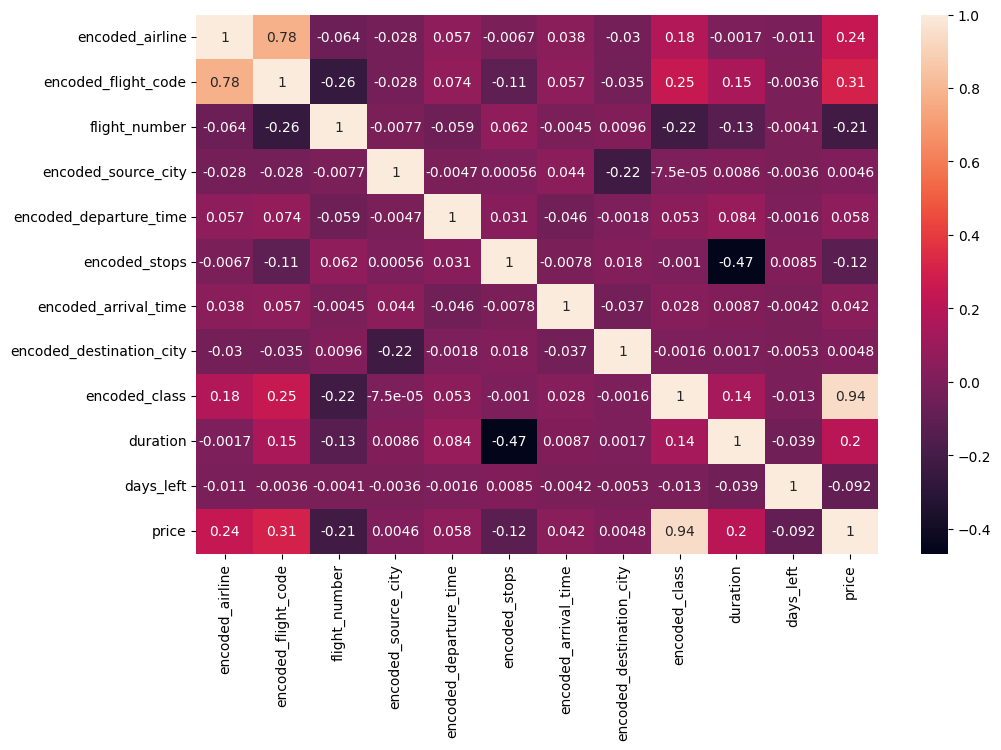

In [143]:
plt.figure(figsize=(11,7))
sns.heatmap( modified_df.corr() , annot=True )

<Axes: xlabel='encoded_class'>

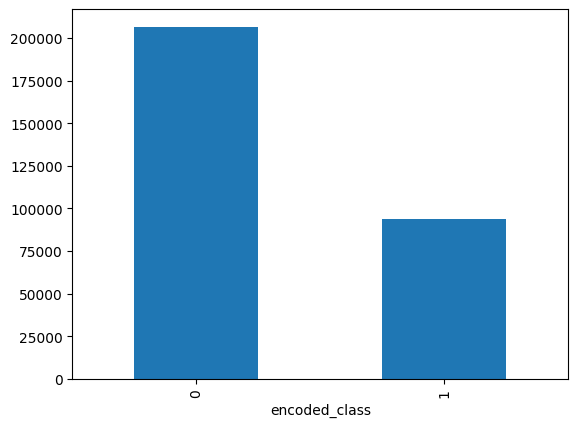

In [147]:
modified_df['encoded_class'].value_counts().plot(kind='bar') ## 0 -> economy , 1 stands for business

<Axes: xlabel='encoded_airline'>

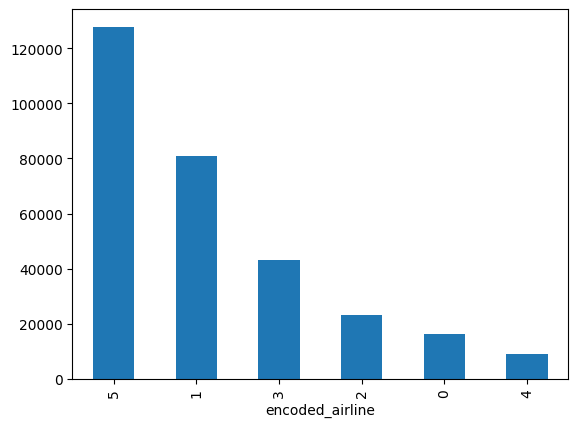

In [149]:
# {'AirAsia': 0, 'Air_India': 1, 'GO_FIRST': 2, 'Indigo': 3, 'SpiceJet': 4, 'Vistara': 5}
modified_df['encoded_airline'].value_counts().plot(kind='bar')

<Axes: ylabel='Count'>

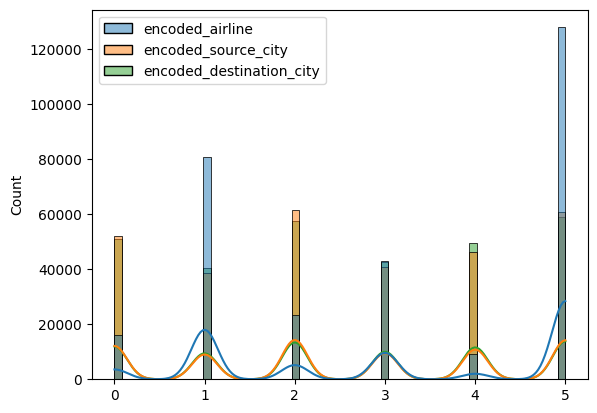

In [152]:
sns.histplot(modified_df[['encoded_airline','encoded_source_city','encoded_destination_city']],kde=True)

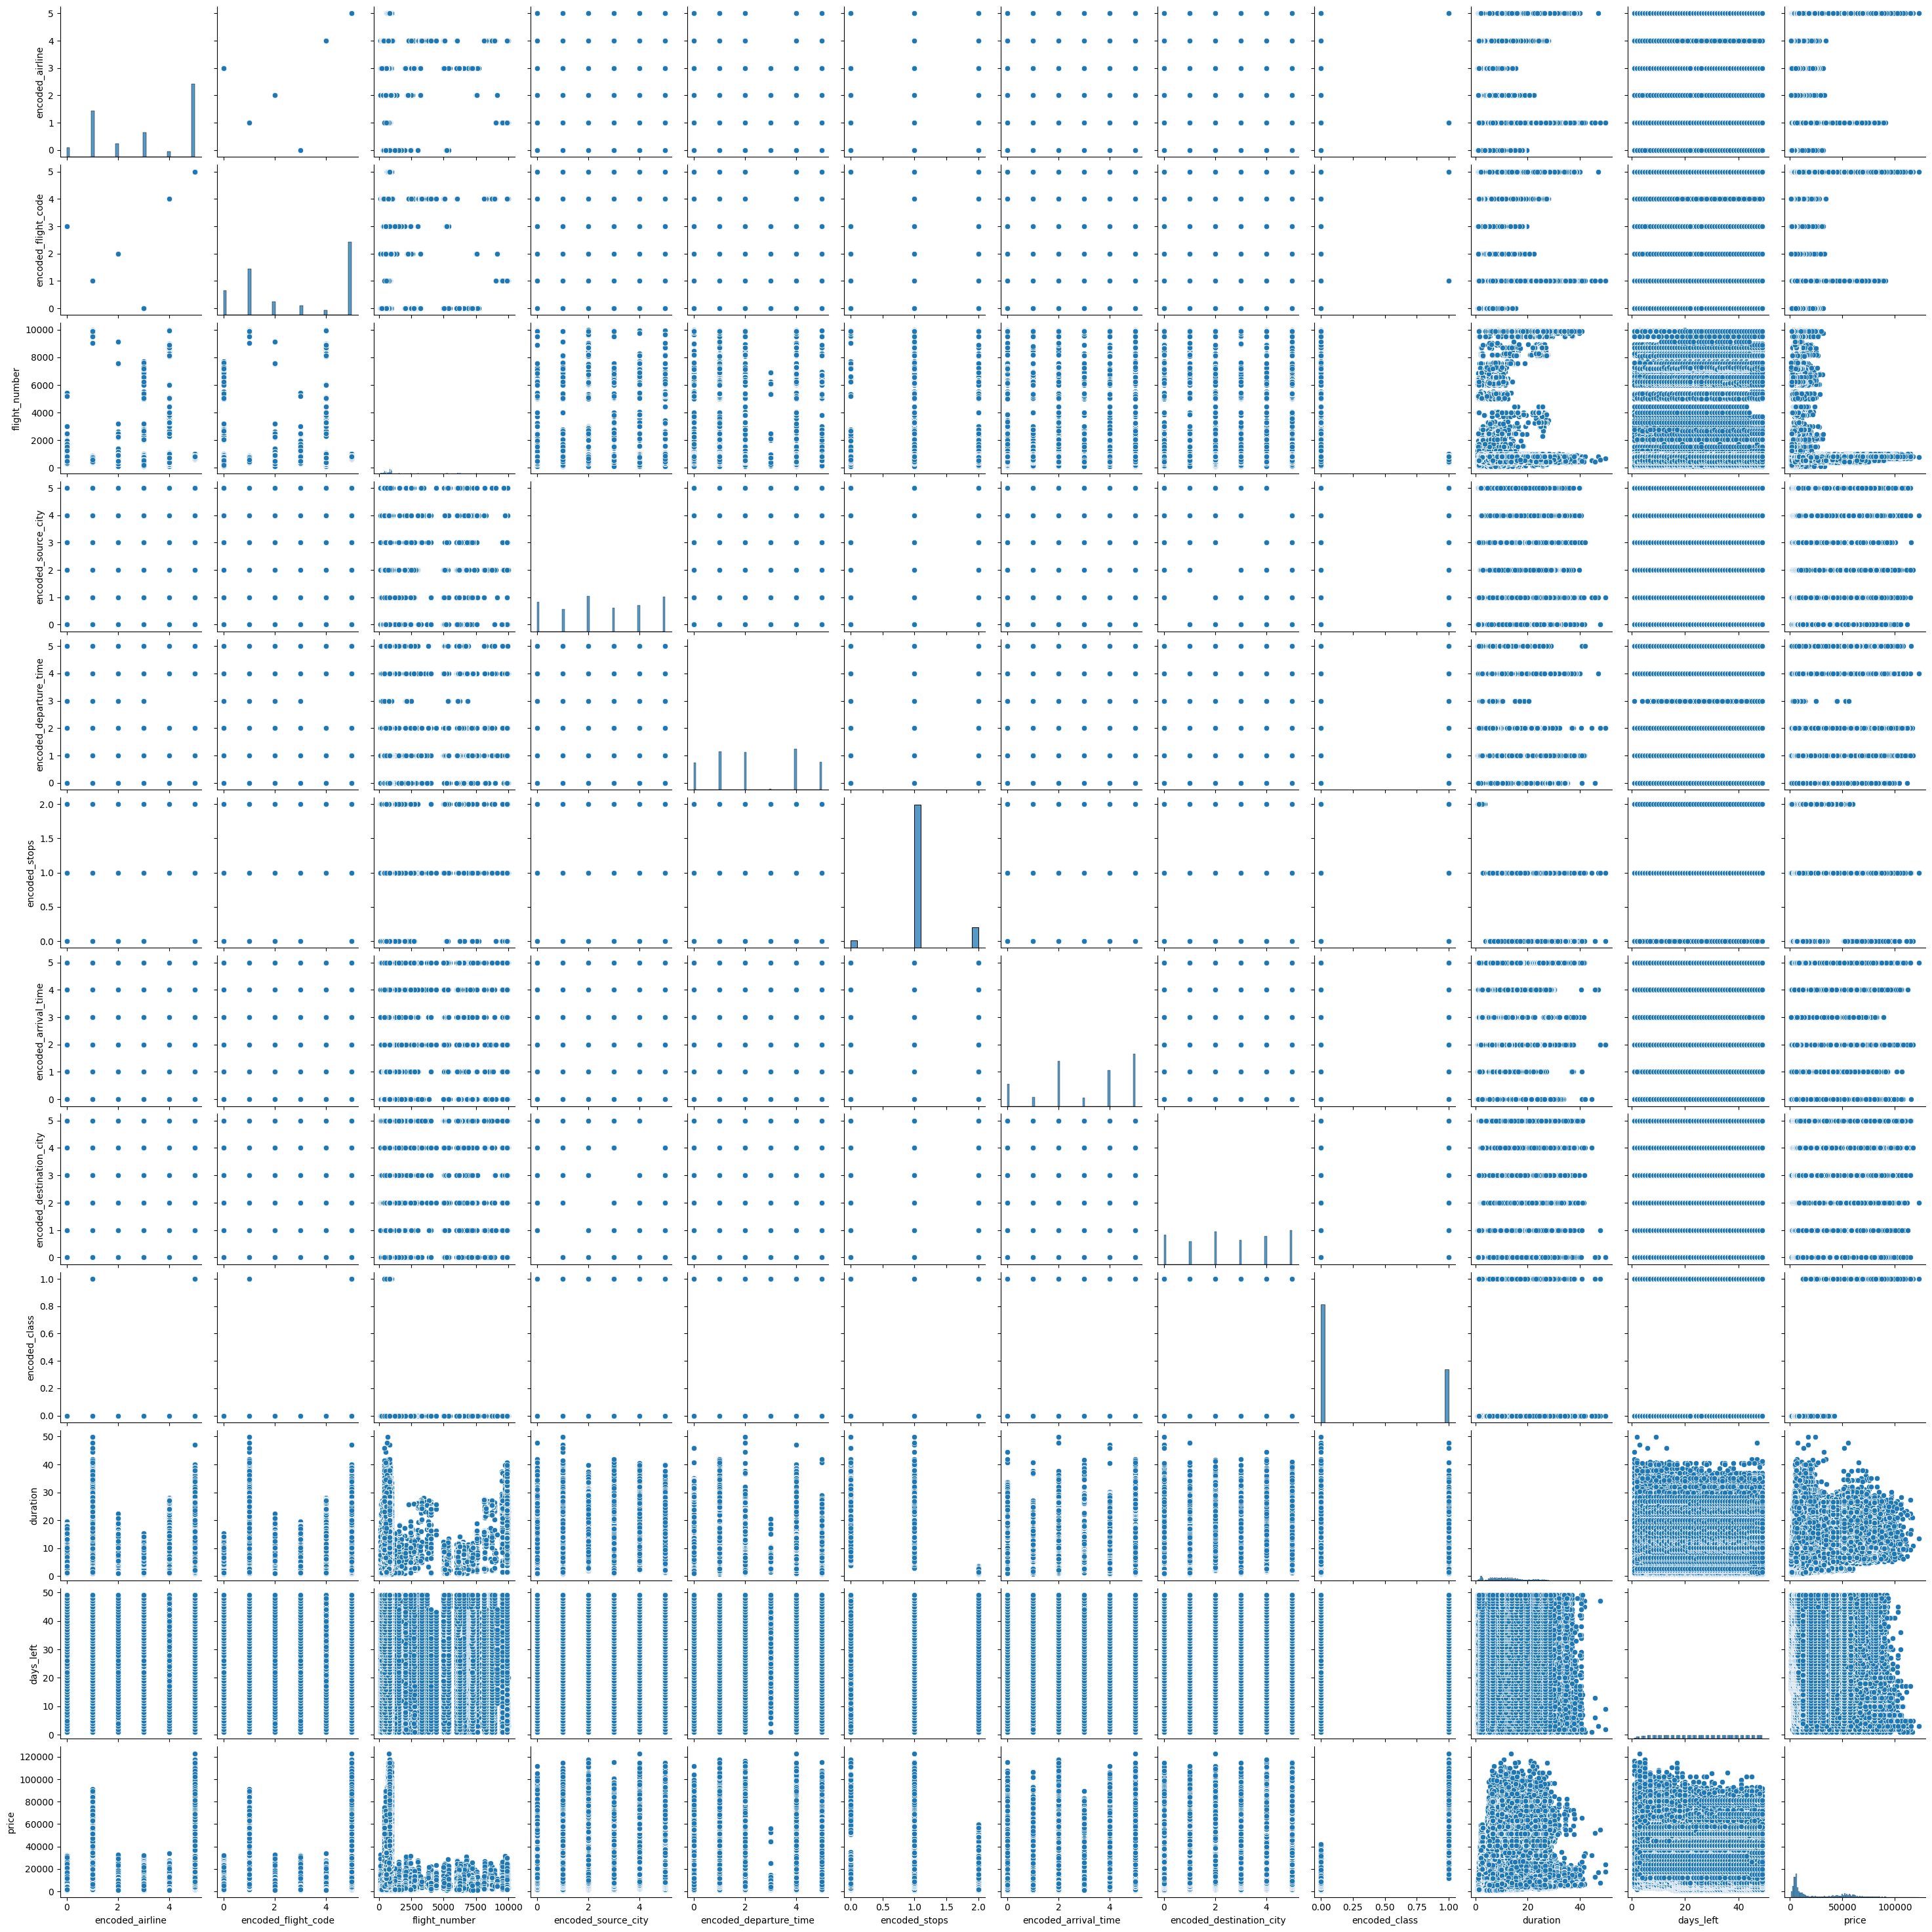

In [153]:
sns.pairplot(modified_df)